In [36]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',
                          index_col='date',
                          parse_dates=True)['demandas']

In [38]:
'''
order(
      p = defini a ordem do polinômio autorregressivo,
      d = defini a ordem do operador de diferença simples,
      q = defini a ordem do polinômio média móvel simples
      )
      
seasonal_order(
               P = defini a ordem do polinômio autorregressivo sazonal,
               D = defini a ordem do operador de diferença sazonal,
               Q = defini a ordem do polinômio média móvel sazonal,
               s = é um inteiro que dá a periodicidade (número de períodos na temporada)
               )
'''
#nosso s seria 52

params={
    'freq':'7d',
    'tren':'ct',
    'order':(8, 1, 4),
    'seasonal_order':(1,1,2x ,52),
}

In [39]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

In [40]:
model=sm.tsa.statespace.SARIMAX(df_train,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\marcio

In [41]:
previsao=results.predict(start=len(df_train),end=len(df_train)+len(df_test),dynamic=True)

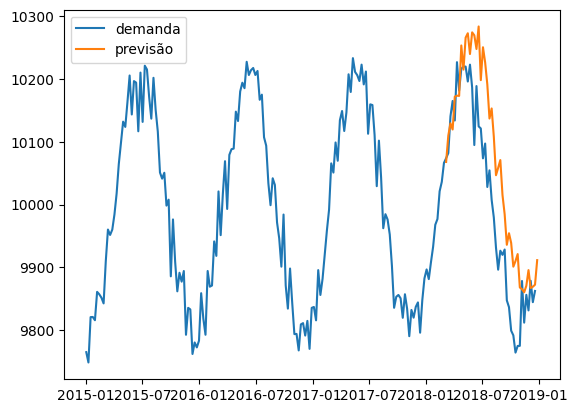

In [42]:
plt.plot(df_demandas,label='demanda')
plt.plot(previsao,label='previsão')
plt.legend()

# Fase de Previsão

In [43]:
qtd_previsoes = 52

In [44]:
model=sm.tsa.statespace.SARIMAX(df_demandas,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\marcio

In [45]:
previsoes = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes,dynamic=True)

In [46]:
funcao_demanda = lambda i: 10000+20*np.cos(6.2831*i/50+1.8849)+np.random.normal(0, 8,1)[0]
demandas_reais = np.array([funcao_demanda(i) for i in range(len(df_demandas),len(df_demandas)+qtd_previsoes)])

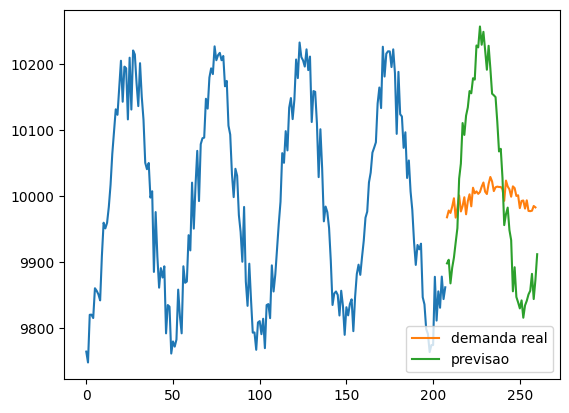

In [47]:
plt.plot(range(len(df_demandas)),df_demandas)
plt.plot(range(len(df_demandas),len(df_demandas)+qtd_previsoes),demandas_reais,label='demanda real')
plt.plot(range(len(df_demandas),len(df_demandas)+qtd_previsoes+1),previsoes,label='previsao')
plt.legend()